# Time Series Forecasting- ARIMA

# Traing for ARIMA model 

In [20]:
######################### Step-4: Model building#####################################################
# ARIMA model with the previously generated best tuning params as (p,d,q)=(2,0,1)
model3 = ARIMA(train, order=(2,0,1))  
results_ARIMA = model3.fit(transparams=True)
print(results_ARIMA.summary())

# from the graphs,we know ARIMA model performs the best, same as indicated by AIC
# all the model parameters(one constant, two AR and one moving average lag) are significant as showing in their P-value.

                              ARMA Model Results                              
Dep. Variable:                     s3   No. Observations:                   48
Model:                     ARMA(2, 1)   Log Likelihood                -297.858
Method:                       css-mle   S.D. of innovations            112.090
Date:                Sun, 15 Jul 2018   AIC                            605.717
Time:                        17:58:54   BIC                            615.073
Sample:                    07-25-2017   HQIC                           609.252
                         - 07-26-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        584.0979     17.680     33.038      0.000     549.447     618.749
ar.L1.s3       1.8946      0.029     66.021      0.000       1.838       1.951
ar.L2.s3      -0.9632      0.028    -33.979      0.0

C:\Users\Lxu90127\AppData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


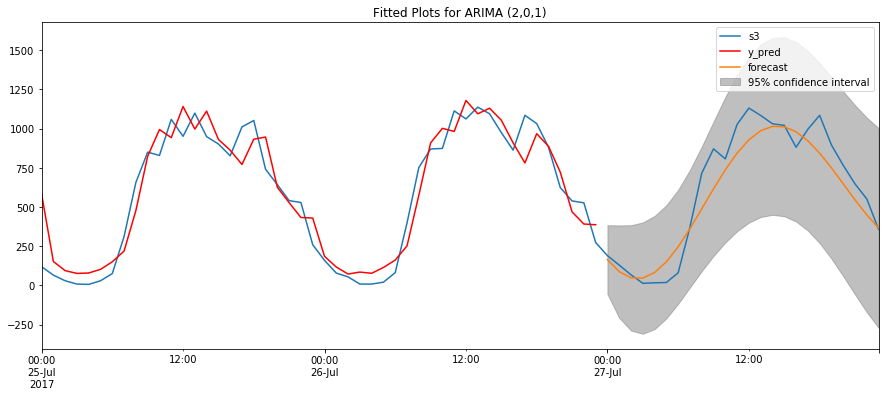

In [51]:
############### cross-validation#######################
# for ARIMA model
fig, ax = plt.subplots()
ax = ts3.plot(ax=ax)
ax = results_ARIMA.fittedvalues.plot(ax=ax, color='red',label='y_pred')
fig = results_ARIMA.plot_predict('2017-07-27 00:00:00', '2017-07-27 23:00:00', ax=ax, plot_insample=False)
plt.legend()
plt.title('Fitted Plots for ARIMA (2,0,1)')
plt.show()

# Modeling using Recurrent Neural Network -- Long short term memory(LSTM) 

# Plotting for goodness of fit for LSTM-A special type of RNN

Train RMSE: 90.703
Test RMSE: 65.913


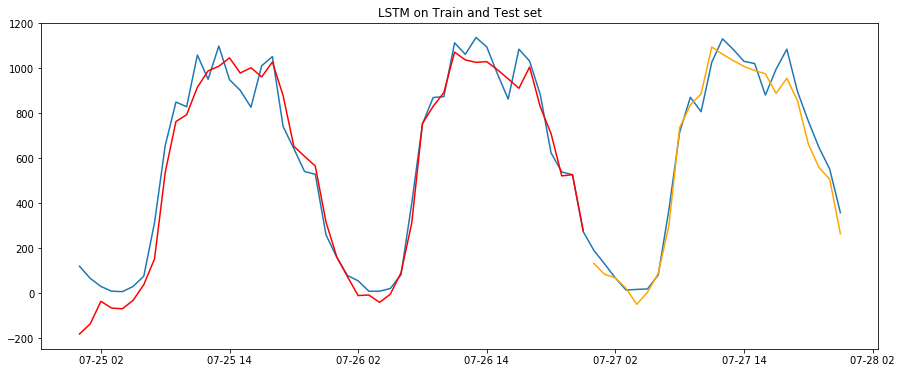

In [104]:
## plot on both train and test fits
def evaluate(model, raw_data, scaled_dataset, scaler, offset, batch_size):
    # separate
    X, y = scaled_dataset[:,0:-1], scaled_dataset[:,-1]
    # reshape
    reshaped = X.reshape(len(X), 1, 1)
    # forecast dataset
    output = model.predict(reshaped, batch_size=batch_size)
    # invert data transforms on forecast
    predictions = list()
    for i in range(len(output)):
        yhat = output[i,0]
        # invert scaling
        yhat = invert_scale(scaler, X[i], yhat)
        # store forecast
        predictions.append(yhat)
    # report performance
    rmse = sqrt(mean_squared_error(raw_data[:,1], predictions))
    return (predictions,rmse)

pred, train_rmse=evaluate(lstm_model, train, train_scaled, scaler, 0, batch_size)
print('Train RMSE: %.3f' % train_rmse)
print('Test RMSE: %.3f' % rmse)
################ plot for fitting ##############################
pred=pd.DataFrame(pred, index=index_hr[0:48])
predictions=pd.DataFrame(predictions, index=index_hr[48:])
plt.plot(ts3)
plt.plot(pred,color='red')
plt.plot(predictions,color='orange')
plt.title('LSTM on Train and Test set')
plt.show()

# Conclusion